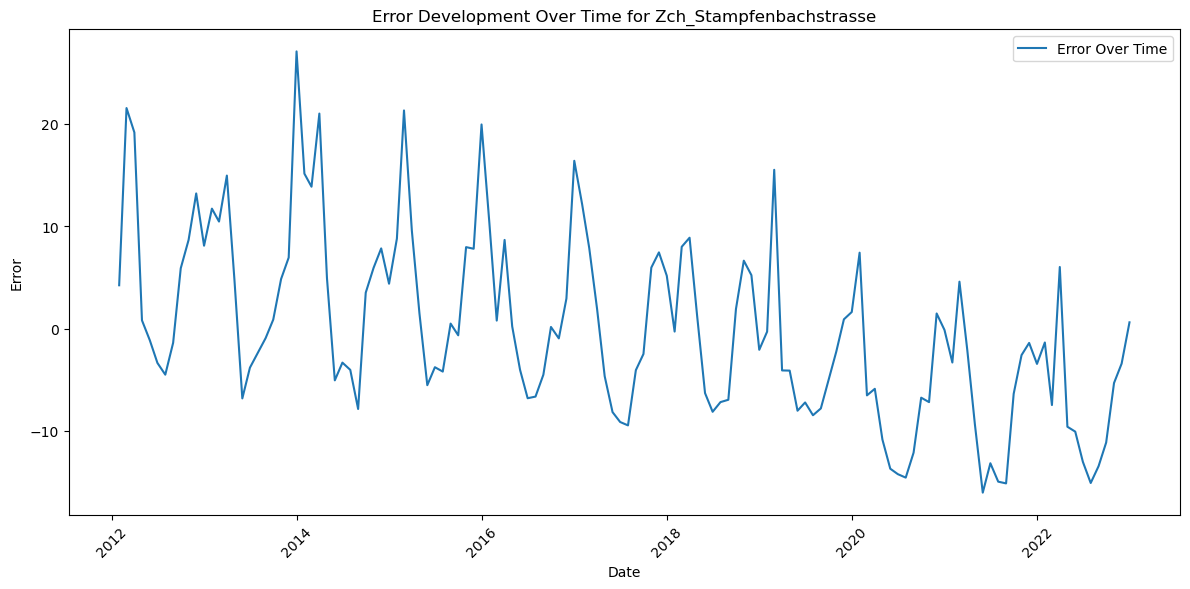

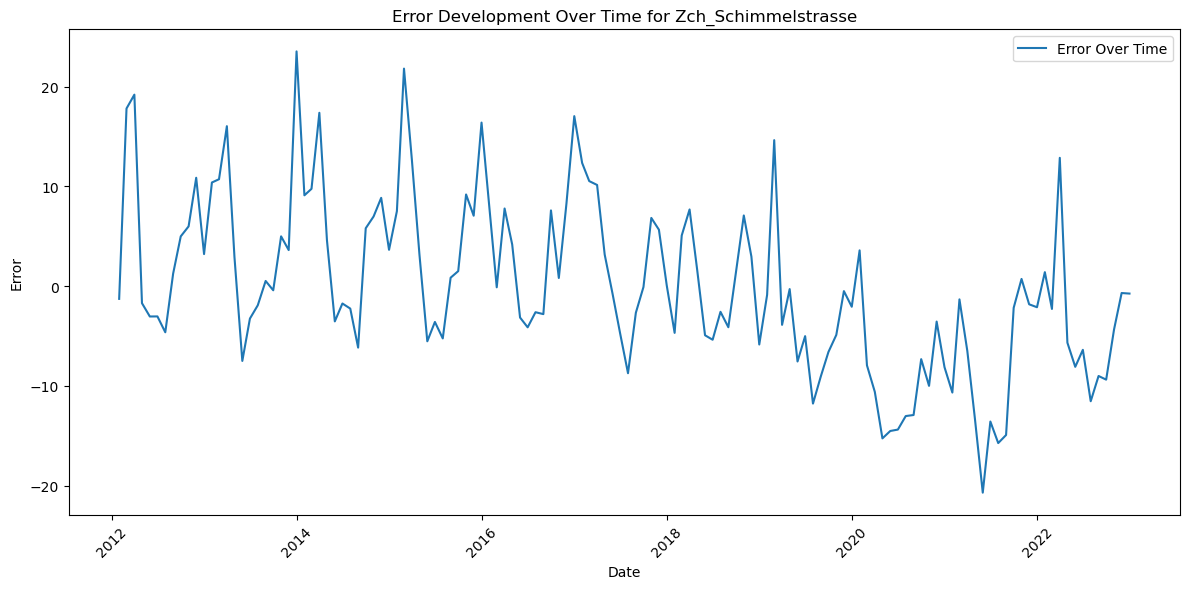

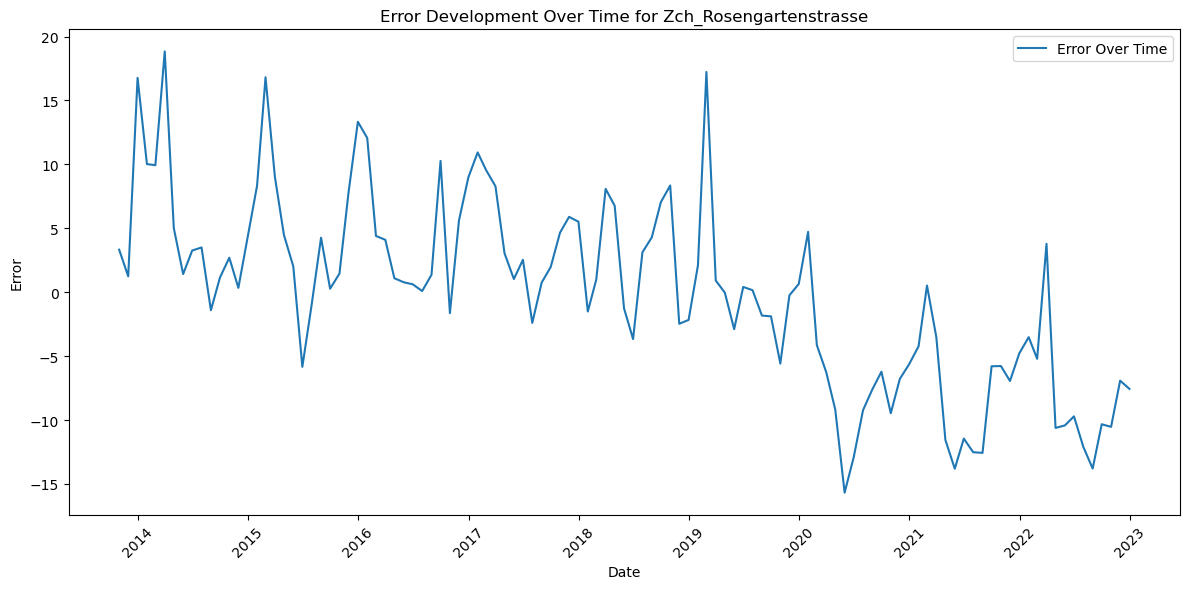

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to perform linear regression and plot error over time, with NaN handling
def analyze_street_with_nan_handling(data, street_name):
    # Filter data for the specific street
    street_data = data[data['Street'] == street_name]

    # Dropping rows with NaN values in TotalDailyTraffic or NO2
    street_data = street_data.dropna(subset=['TotalDailyTraffic', 'NO2'])

    # Extracting TotalDailyTraffic and NO2 values
    X = street_data[['TotalDailyTraffic']]
    y = street_data['NO2']

    # Linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predicting NO2 values
    predictions = model.predict(X)

    # Calculating errors
    errors = y - predictions

    # Plotting the error over time
    plt.figure(figsize=(12, 6))
    plt.plot(street_data['Datum'], errors, label='Error Over Time')
    plt.title(f'Error Development Over Time for {street_name}')
    plt.xlabel('Date')
    plt.ylabel('Error')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Load the dataset

data = pd.read_csv('finaldata/merged_with_dummies.csv')

# Convert 'Datum' to datetime and resample data to a monthly frequency for each street
data['Datum'] = pd.to_datetime(data['Datum'])
monthly_data = data.set_index('Datum').groupby('Street').resample('M').mean().reset_index()

# Unique streets in the dataset
unique_streets = data['Street'].unique()

# Analyzing and plotting for each street with monthly data
for street in unique_streets:
    analyze_street_with_nan_handling(monthly_data, street)


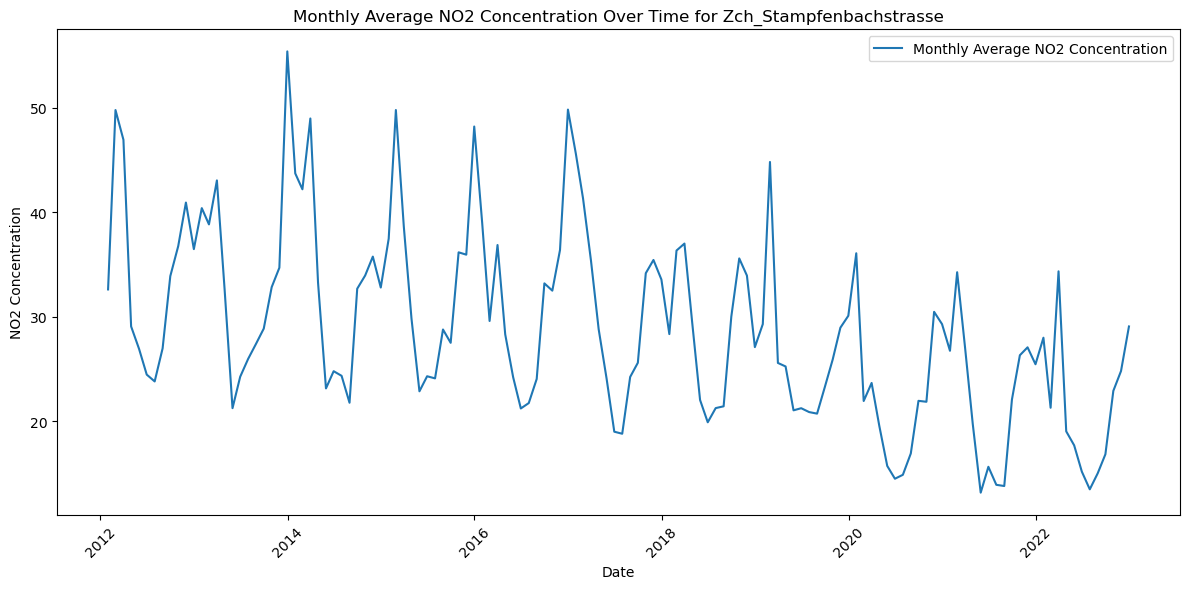

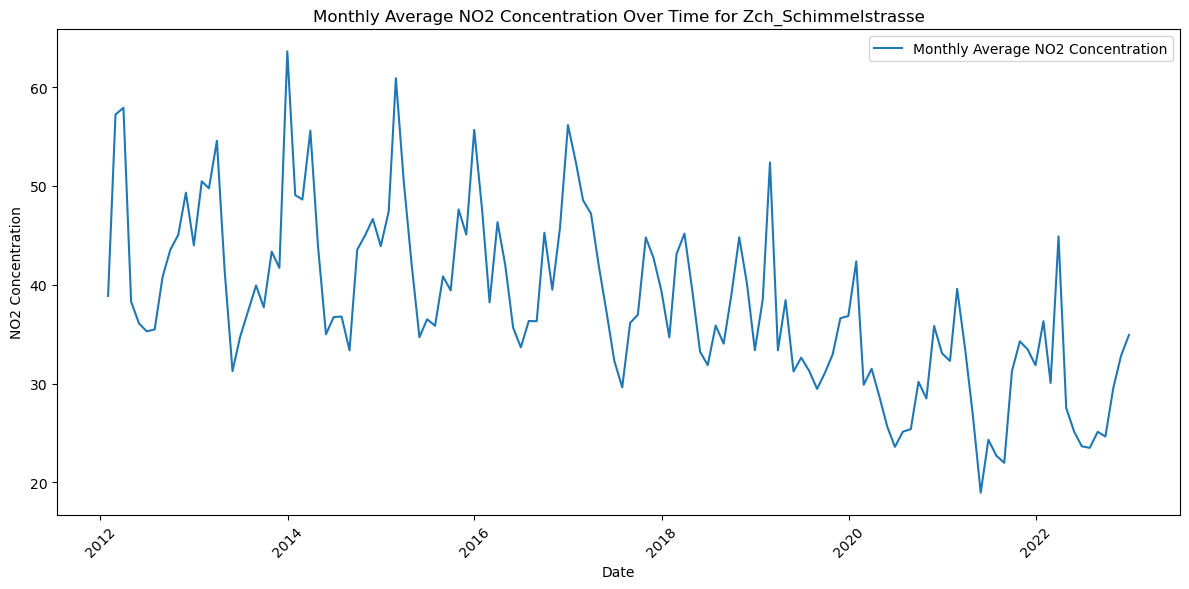

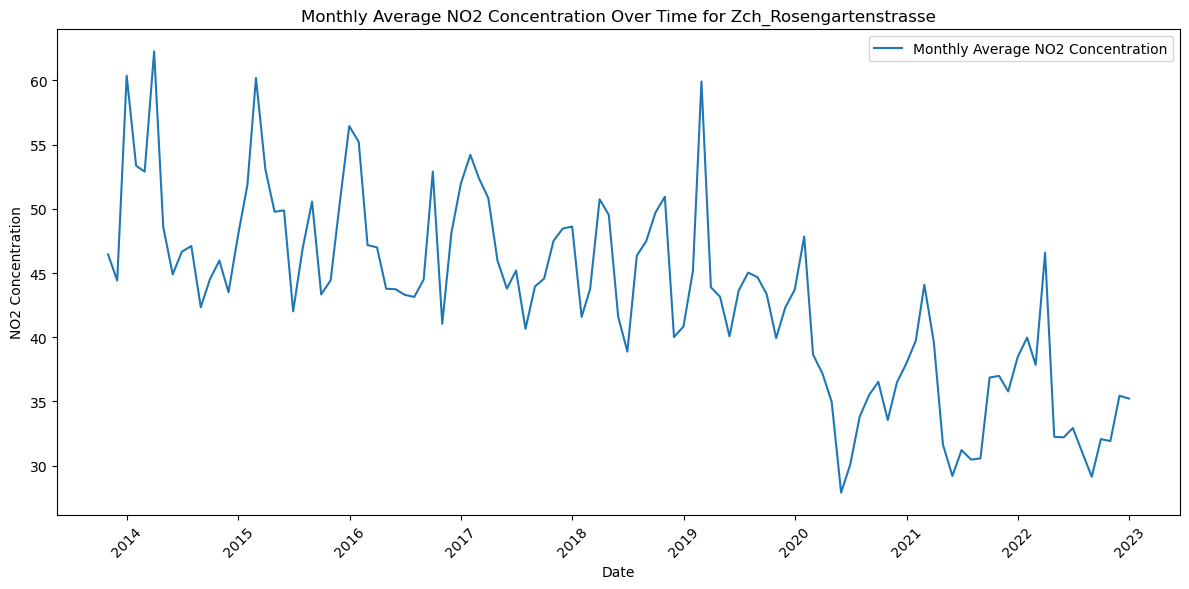

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot monthly NO2 concentration for a given street
def plot_monthly_NO2(data, street_name):
    # Filter data for the specific street
    street_data = data[data['Street'] == street_name]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(street_data['Datum'], street_data['NO2'], label='Monthly Average NO2 Concentration')
    plt.title(f'Monthly Average NO2 Concentration Over Time for {street_name}')
    plt.xlabel('Date')
    plt.ylabel('NO2 Concentration')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


data = pd.read_csv('finaldata/merged_with_dummies.csv')

# Convert 'Datum' to datetime and resample data to a monthly frequency for each street
data['Datum'] = pd.to_datetime(data['Datum'])
monthly_data = data.set_index('Datum').groupby('Street').resample('M').mean().reset_index()

# Unique streets in the dataset
unique_streets = data['Street'].unique()

# Plotting monthly NO2 concentration for each street
for street in unique_streets:
    plot_monthly_NO2(monthly_data, street)
